In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('C:/Users/Pc/Desktop/Steel Industry Energy/Regression/Steel_industry_data.csv')

# Exploratory Data Analysis (EDA)

In [3]:
df.dtypes

date                                     object
Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
WeekStatus                               object
Day_of_week                              object
Load_Type                                object
dtype: object

In [34]:
df = df.rename(columns={'Usage_kWh':'Consumption(kWh)',
                        'Lagging_Current_Reactive.Power_kVarh':'Lagging Reactive Power(kVarh)',
                        'Leading_Current_Reactive_Power_kVarh':'Leading Reactive Power(kVarh)',
                        'Lagging_Current_Power_Factor':'Lagging Power Factor',
                        'Leading_Current_Power_Factor':'Leading Power Factor',
                        'CO2(tCO2)':'CO2(ppm)'})

In [5]:
df.isnull().sum()

# While indicated in the source dataset, checking for null values is always a good habit as a part of our EDA. 

date                             0
Consumption(kWh)                 0
Lagging Reactive Power(kVarh)    0
Leading Reactive Power(kVarh)    0
CO2(ppm)                         0
Lagging Power Factor             0
Leading Power Factor             0
NSM                              0
WeekStatus                       0
Day_of_week                      0
Load_Type                        0
dtype: int64

In [6]:
df.head(50)

,date,Consumption(kWh),Lagging Reactive Power(kVarh),Leading Reactive Power(kVarh),CO2(ppm),Lagging Power Factor,Leading Power Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,1/1/2018 0:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,1/1/2018 0:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,1/1/2018 0:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,1/1/2018 1:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,1/1/2018 1:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
5,1/1/2018 1:30,3.28,3.56,0.00,0.0,67.76,100.00,5400,Weekday,Monday,Light_Load
6,1/1/2018 1:45,3.60,4.14,0.00,0.0,65.62,100.00,6300,Weekday,Monday,Light_Load
7,1/1/2018 2:00,3.60,4.28,0.00,0.0,64.37,100.00,7200,Weekday,Monday,Light_Load
8,1/1/2018 2:15,3.28,3.64,0.00,0.0,66.94,100.00,8100,Weekday,Monday,Light_Load
9,1/1/2018 2:30,3.78,4.72,0.00,0.0,62.51,100.00,9000,Weekday,Monday,Light_Load


In [35]:
# Tabulated statistical values of each column
df.describe().T.round(2)

,count,mean,min,25%,50%,75%,max,std
Consumption(kWh),35040.0,27.386892,0.0,3.2,4.57,51.2375,157.18,33.44438
Lagging Reactive Power(kVarh),35040.0,13.035384,0.0,2.3,5.0,22.64,96.91,16.306
Leading Reactive Power(kVarh),35040.0,3.870949,0.0,0.0,0.0,2.09,27.76,7.424463
Lagging Power Factor,35040.0,80.578056,0.0,63.32,87.96,99.0225,100.0,18.921322
Leading Power Factor,35040.0,84.36787,0.0,99.7,100.0,100.0,100.0,30.456535
Load_Type,35040.0,0.760959,0.0,0.0,0.0,2.0,2.0,0.857523
month,35040.0,6.526027,1.0,4.0,7.0,10.0,12.0,3.447901
time_of_day,35040,1900-01-01 11:52:29.999999488,1900-01-01 00:00:00,1900-01-01 05:56:15,1900-01-01 11:52:30,1900-01-01 17:48:45,1900-01-01 23:45:00,NaN
hour,35040.0,11.5,0.0,5.75,11.5,17.25,23.0,6.922285
minute,35040.0,22.5,0.0,11.25,22.5,33.75,45.0,16.770749


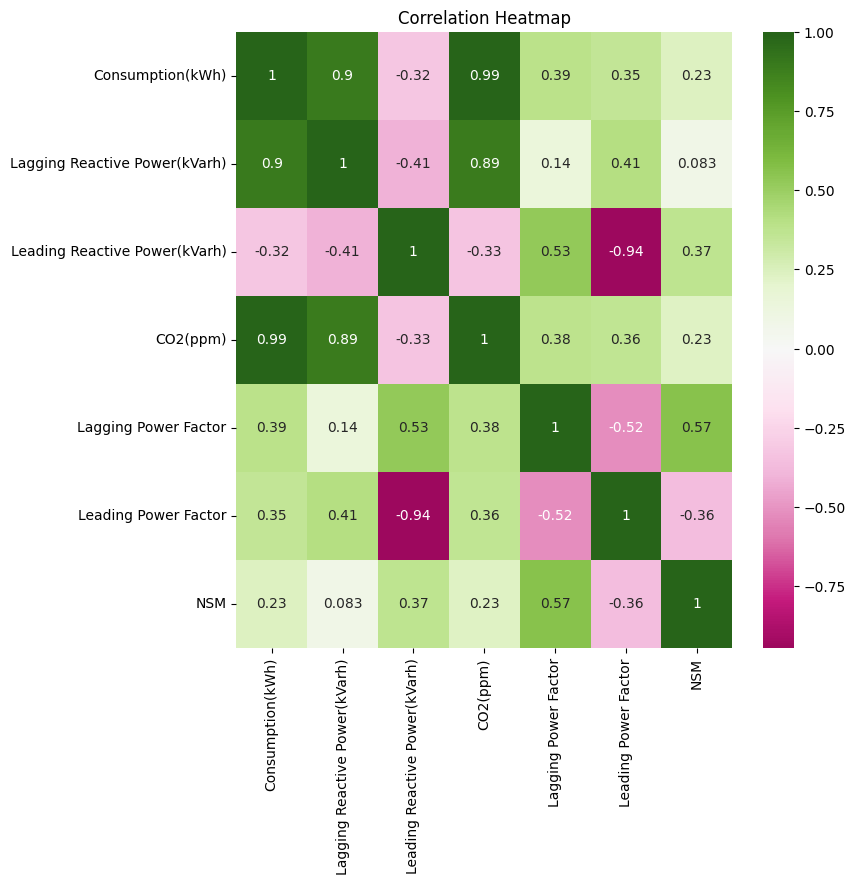

In [8]:
# making a correlation matrix for all the columns with int or float values. 

correlation_matrix = df.drop(['date', 'WeekStatus', 'Day_of_week', 'Load_Type'], axis=1).corr()

plt.figure(figsize=(8 , 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', center=0)
plt.title('Correlation Heatmap')
plt.show()

Energy consumption is a metric that quantifies the amount of energy used or consumed by a certain system or process over a certain period of time. It's important to deep dive into this variable as it's a valuable indicator of resource management and sustainability. 

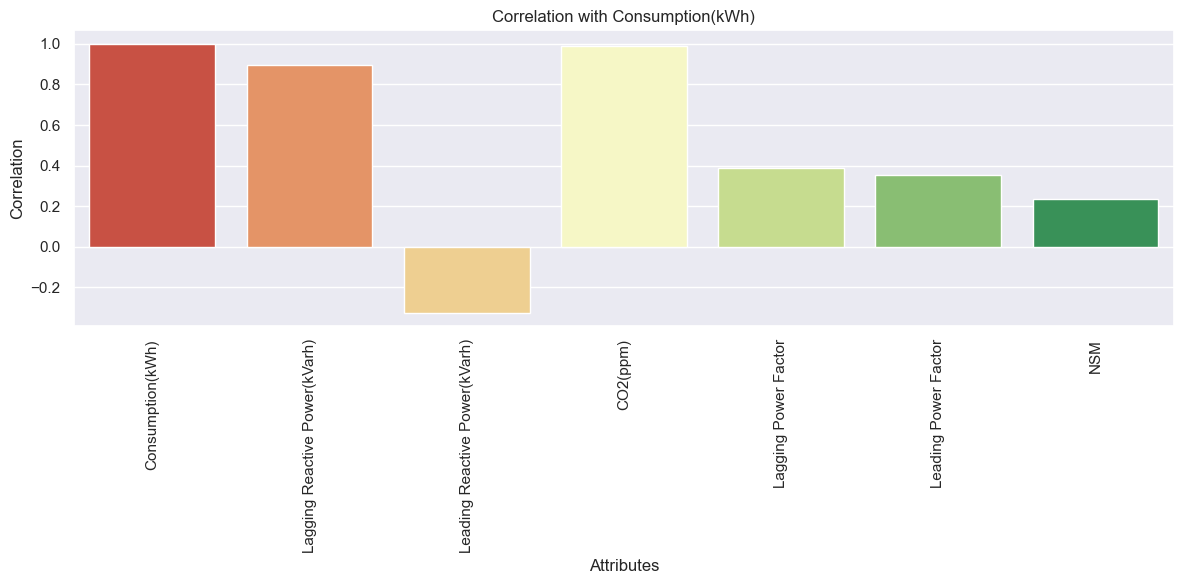

In [9]:
# In the context of energy consumption, we're going to isolate the correlations between various continuous variables and it. 
usage_corr = correlation_matrix['Consumption(kWh)']

custom_palette = sns.color_palette("RdYlGn", n_colors=len(usage_corr))

sns.set()
plt.figure(figsize=(12, 6))
sns.barplot(x=usage_corr.index, y=usage_corr.values, palette=custom_palette)
plt.title('Correlation with Consumption(kWh)')
plt.xlabel('Attributes')
plt.ylabel('Correlation')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

#from the barplot above each of the continous variables may have a significant effect on the energy consumption parameter

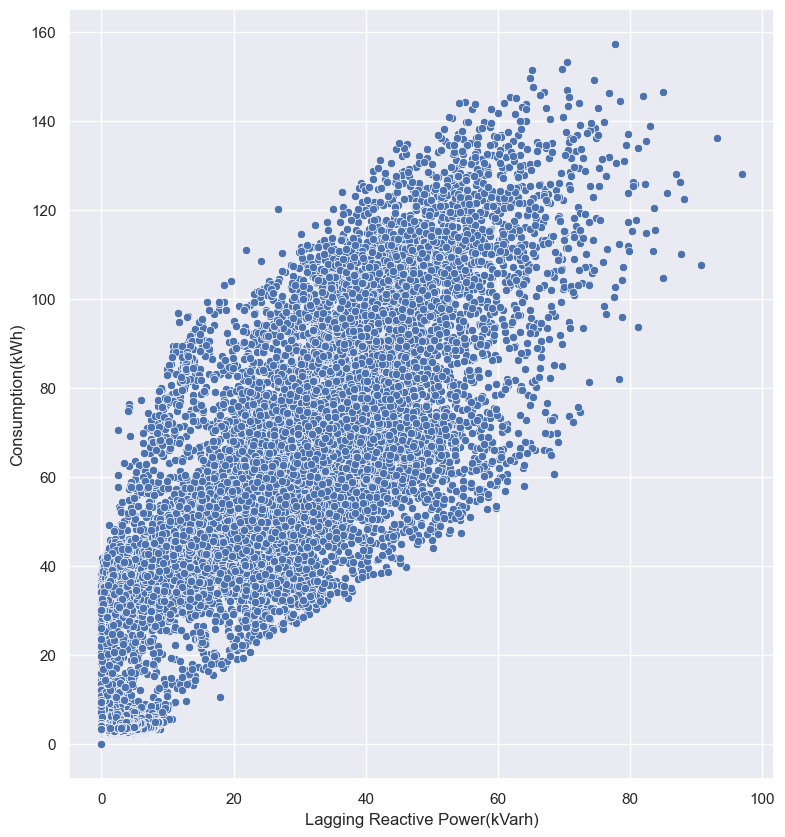

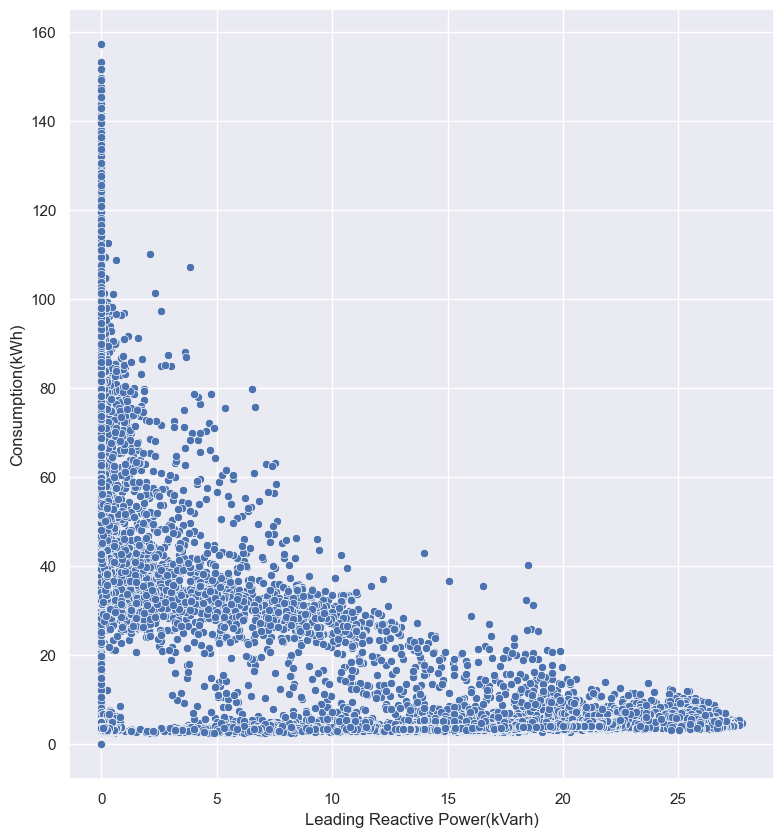

In [10]:
#Plotting Consumption vs Lagging Reactive Power
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.scatterplot(x=df['Lagging Reactive Power(kVarh)'], y=df['Consumption(kWh)'])
plt.show()


# Plotting Consumption vs Leading Reactive Power
plt.figure(figsize=(20,10))
plt.subplot(1,2,2)
sns.scatterplot(x=df['Leading Reactive Power(kVarh)'], y=df['Consumption(kWh)'])
plt.show()

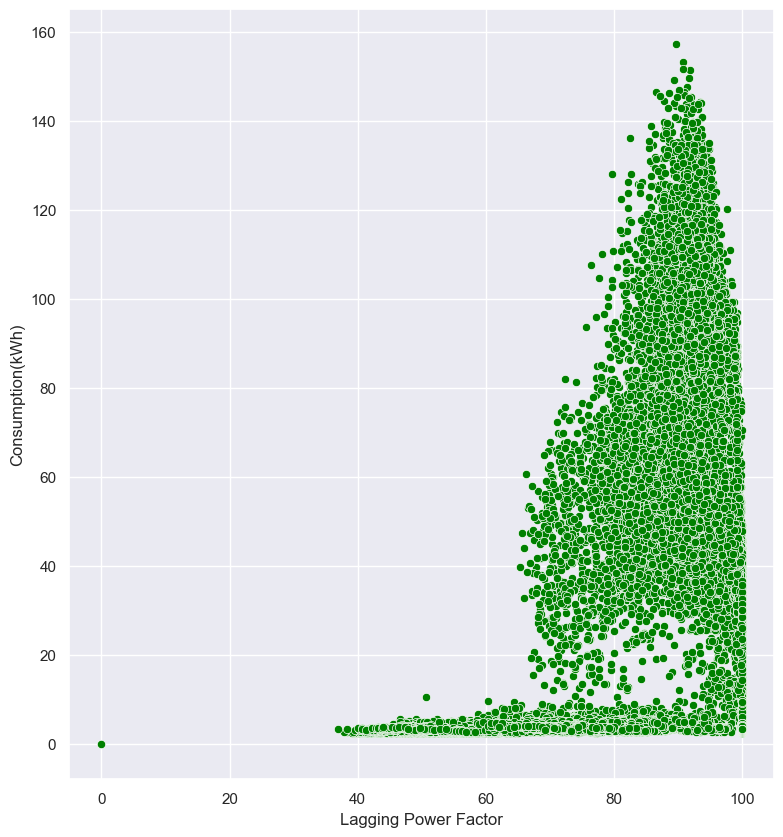

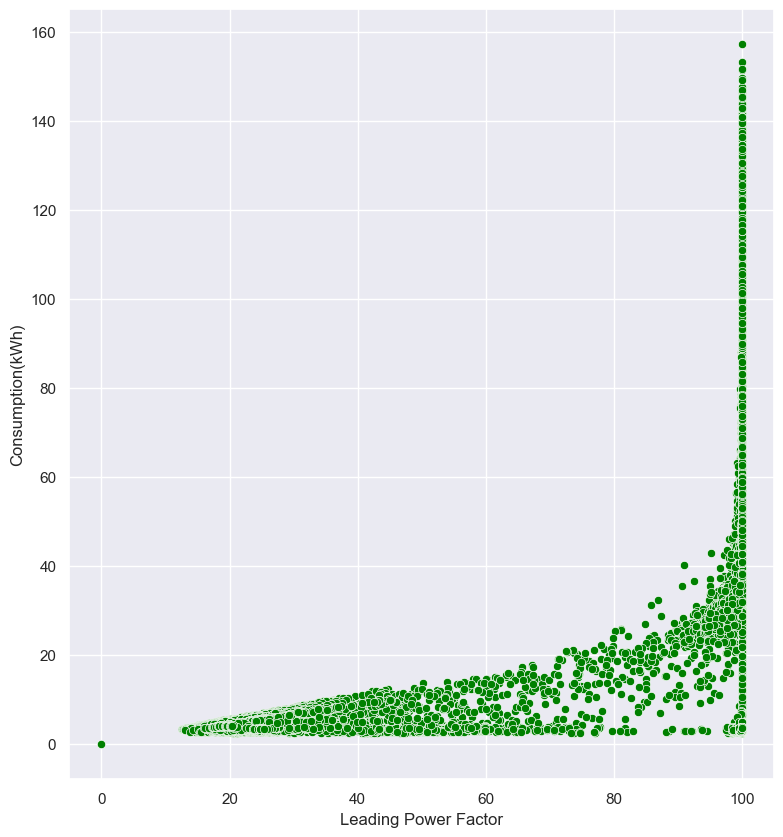

In [11]:
plt.figure(figsize=(20,10))

#Plotting Consumption vs Lagging Power Factor
plt.subplot(1,2,1)
sns.scatterplot(x=df['Lagging Power Factor'], y=df['Consumption(kWh)'], c='green')
plt.show()


#Plotting Consumption vs Leading Power Factor
plt.figure(figsize=(20,10))
plt.subplot(1,2,2)
sns.scatterplot(x=df['Leading Power Factor'], y=df['Consumption(kWh)'], c='green')
plt.show()

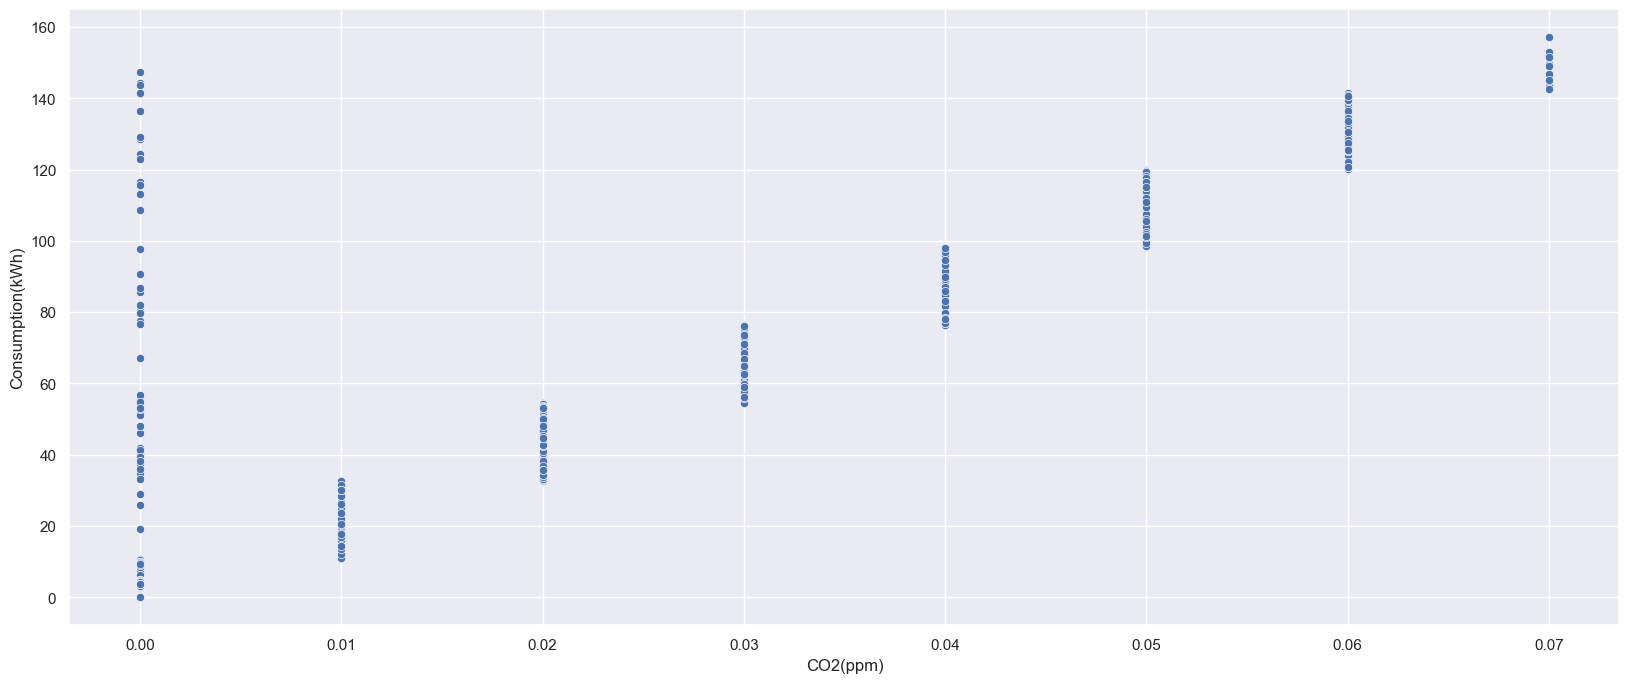

In [12]:
plt.figure(figsize=(20,8))
#Plotting Consumption vs CO2 emission (ppm)
sns.scatterplot(x=df['CO2(ppm)'], y=df['Consumption(kWh)'])
plt.show()

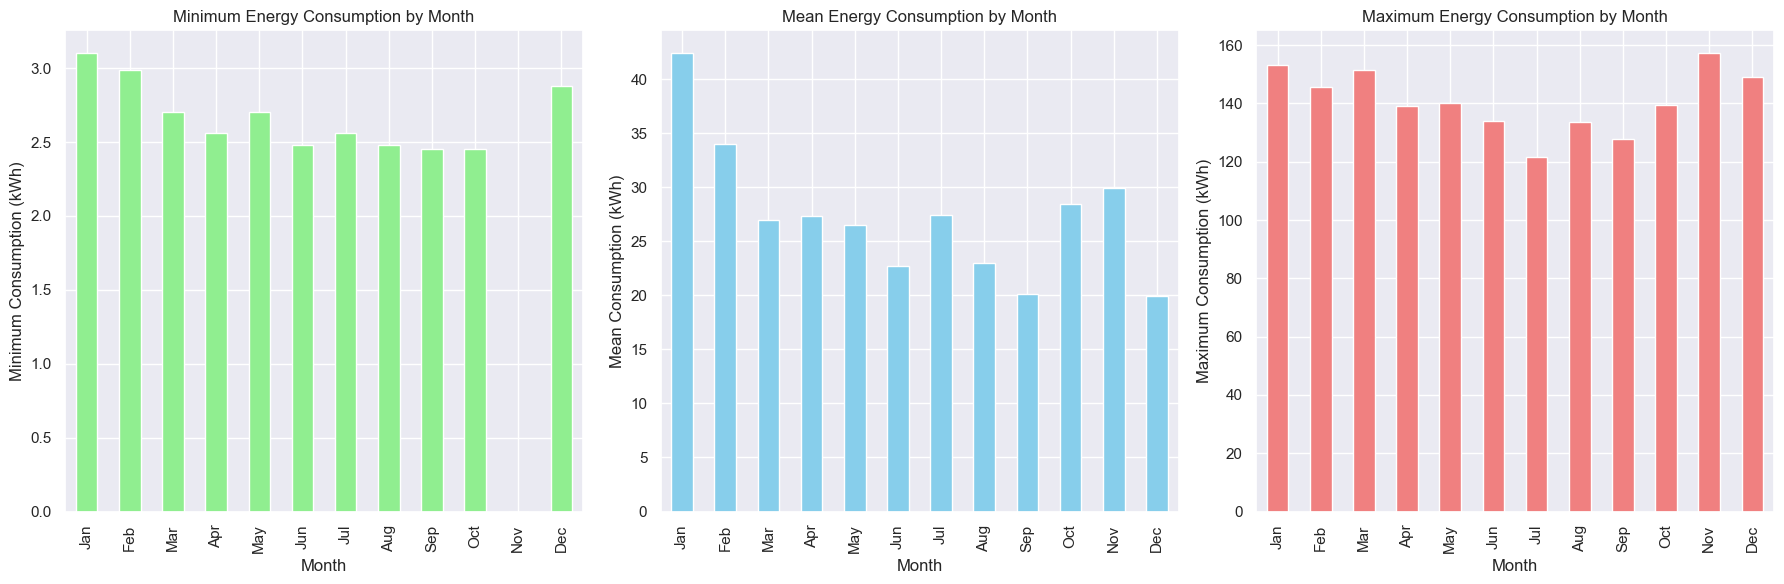

In [13]:
#visualising which months of 2018 had consumed the most energy.


df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y %H:%M')


df['month'] = df['date'].dt.month


monthly_mean_consumption = df.groupby('month')['Consumption(kWh)'].mean()
monthly_max_consumption = df.groupby('month')['Consumption(kWh)'].max()
monthly_min_consumption = df.groupby('month')['Consumption(kWh)'].min()


sns.set()

plt.figure(figsize=(18, 6))


plt.subplot(1, 3, 1)
monthly_min_consumption.plot(kind='bar', color='lightgreen')
plt.title('Minimum Energy Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Minimum Consumption (kWh)')
plt.xticks(monthly_min_consumption.index - 1, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


plt.subplot(1, 3, 2)
monthly_mean_consumption.plot(kind='bar', color='skyblue')
plt.title('Mean Energy Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Mean Consumption (kWh)')
plt.xticks(monthly_mean_consumption.index - 1, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


plt.subplot(1, 3, 3)
monthly_max_consumption.plot(kind='bar', color='lightcoral')
plt.title('Maximum Energy Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Maximum Consumption (kWh)')
plt.xticks(monthly_max_consumption.index - 1, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])




plt.tight_layout()

plt.show()

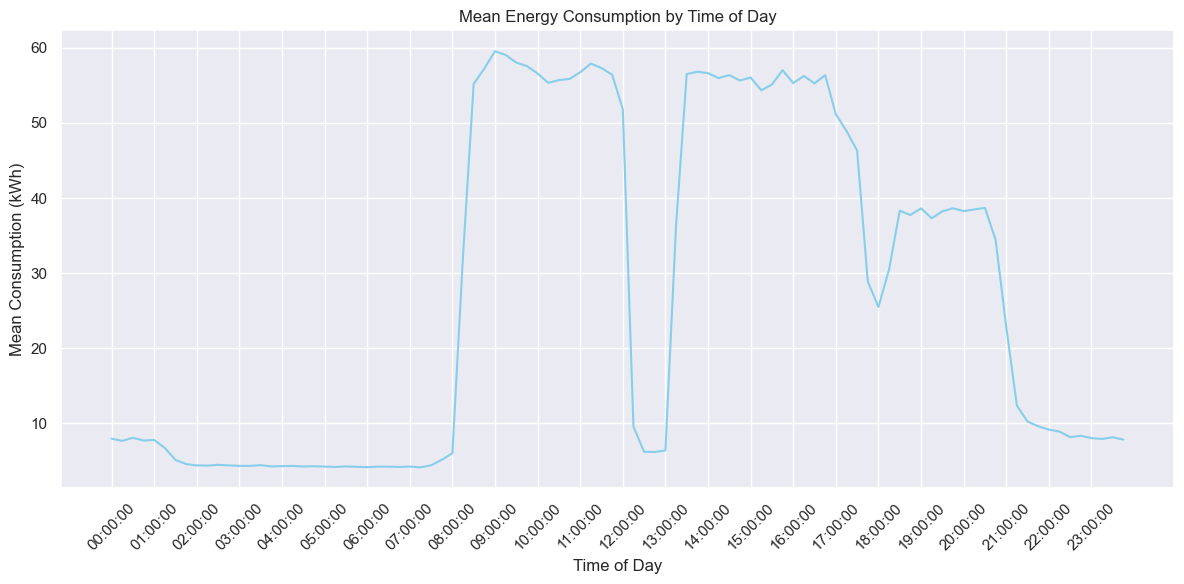

In [14]:
#Visualising which times of the day are most likely to consume energy 

df['time_of_day'] = df['date'].dt.time

#converting time to string used on the x-axis ticks 

mean_consumption_by_time = df.groupby('time_of_day')['Consumption(kWh)'].mean()
mean_consumption_by_time.index = mean_consumption_by_time.index.astype(str)

plt.figure(figsize=(12, 6))
mean_consumption_by_time.plot(kind='line', color='skyblue')
plt.title('Mean Energy Consumption by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Mean Consumption (kWh)')


x_ticks = range(0, len(mean_consumption_by_time), 4)
x_tick_labels = mean_consumption_by_time.index[::4]


plt.xticks(x_ticks, x_tick_labels, rotation=45)
plt.tight_layout()
plt.show()

In [15]:
weekday_df = df[df['WeekStatus'] == 'Weekday']
weekend_df = df[df['WeekStatus'] == 'Weekend']

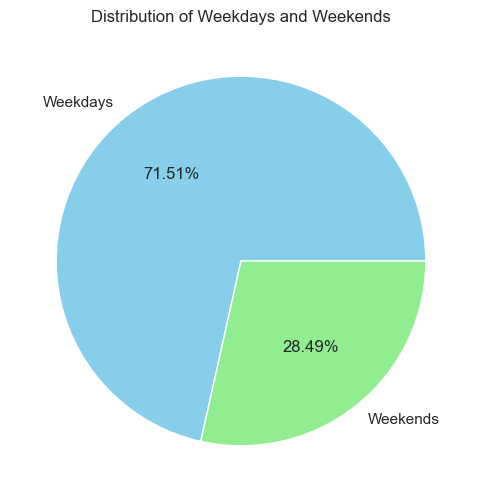

In [16]:
sns.set()
plt.figure(figsize=(6,6))
plt.pie(df['WeekStatus'].value_counts(), labels=['Weekdays', 'Weekends'],  autopct='%1.2f%%', colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Weekdays and Weekends')
plt.show()

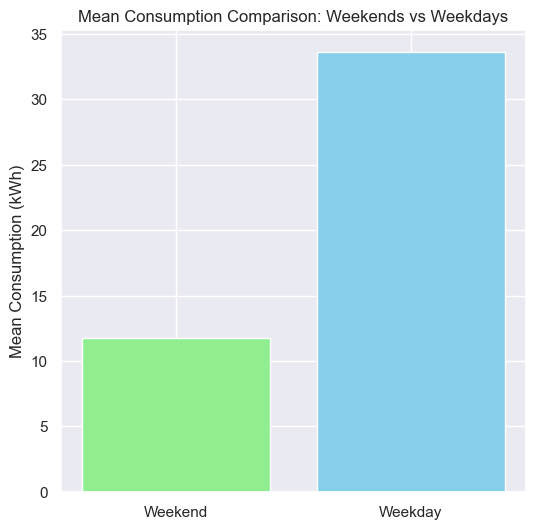

In [17]:
#Visualising the energy consumption difference between weekends and weekdays

weekend_mean = weekend_df['Consumption(kWh)'].mean()
weekday_mean = weekday_df['Consumption(kWh)'].mean()

sns.set()
plt.figure(figsize=(6, 6))
plt.bar(['Weekend', 'Weekday'], [weekend_mean, weekday_mean], color=['lightgreen', 'skyblue'])
plt.title('Mean Consumption Comparison: Weekends vs Weekdays')
plt.ylabel('Mean Consumption (kWh)')
plt.show()

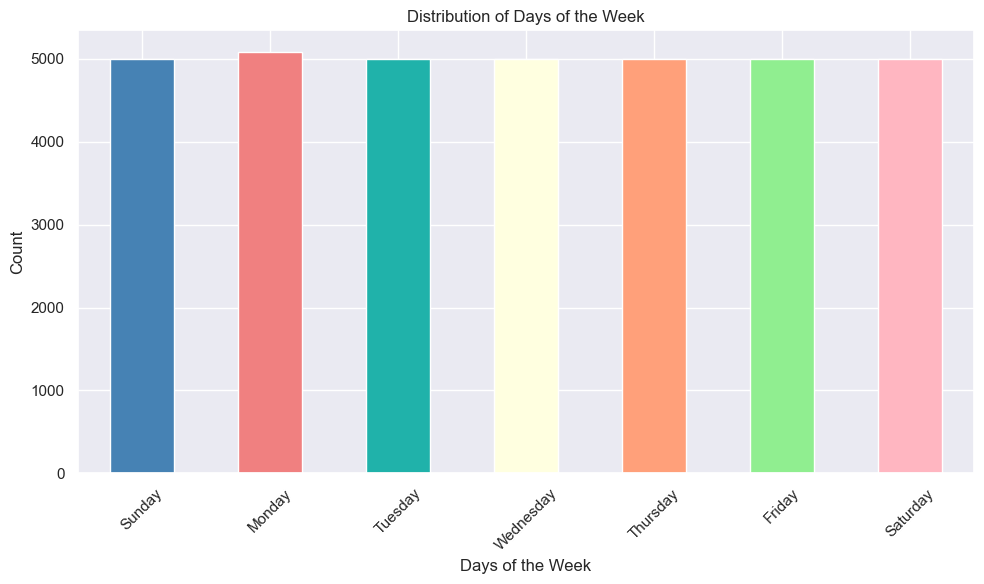

In [18]:
day_of_week_counts = df['Day_of_week'].value_counts().sort_index()

day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

colors = ['steelblue', 'lightcoral', 'lightseagreen', 'lightyellow', 'lightsalmon', 'lightgreen', 'lightpink']

sns.set()
plt.figure(figsize=(10,6))
day_of_week_counts.loc[day_order].plot(kind='bar', color=colors)
plt.title('Distribution of Days of the Week')
plt.xlabel('Days of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


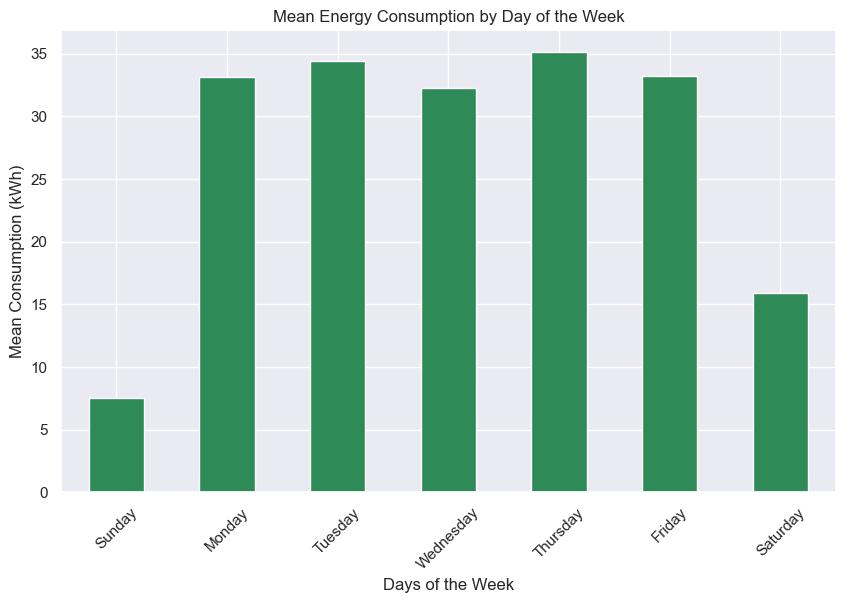

In [19]:
day_of_week_mean_consumption = df.groupby('Day_of_week')['Consumption(kWh)'].mean()

sns.set()
plt.figure(figsize=(10,6))
day_of_week_mean_consumption.loc[day_order].plot(kind='bar', color='seagreen')
plt.title('Mean Energy Consumption by Day of the Week')
plt.xlabel('Days of the Week')
plt.ylabel('Mean Consumption (kWh)')
plt.xticks(rotation=45)
plt.show()

Based on the time series data, January relatively consumes the most energy compared to other months. Additionally, weekdays exhibit similar mean energy consumption values, indicating that significant energy-intensive processes primarily occur on weekdays.  Furthermore, the period between 8:00 A.M. and 11:00 A.M. shows the highest energy consumption levels throughout the day.

### Visualising the effect of Load type to the various continous variables and energy consumption

In [20]:
light_load_df = df[df['Load_Type'] == 'Light_Load']
mid_load_df = df[df['Load_Type'] == 'Medium_Load']
max_load_df = df[df['Load_Type'] == 'Maximum_Load']

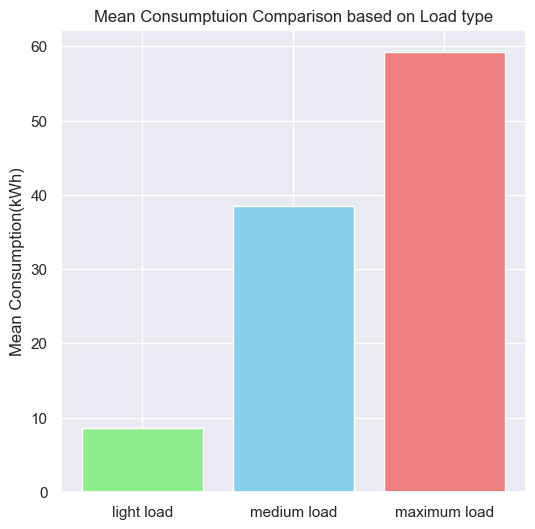

In [21]:
#Plotting Consumption vs Load type

light_load_mean = light_load_df['Consumption(kWh)'].mean()
mid_load_mean = mid_load_df['Consumption(kWh)'].mean()
max_load_mean = max_load_df['Consumption(kWh)'].mean()

sns.set()
plt.figure(figsize=(6, 6))
plt.bar(['light load', 'medium load', 'maximum load'], [light_load_mean, mid_load_mean, max_load_mean], color=['lightgreen', 'skyblue', 'lightcoral']) 
plt.title('Mean Consumptuion Comparison based on Load type')
plt.ylabel('Mean Consumption(kWh)')
plt.show()

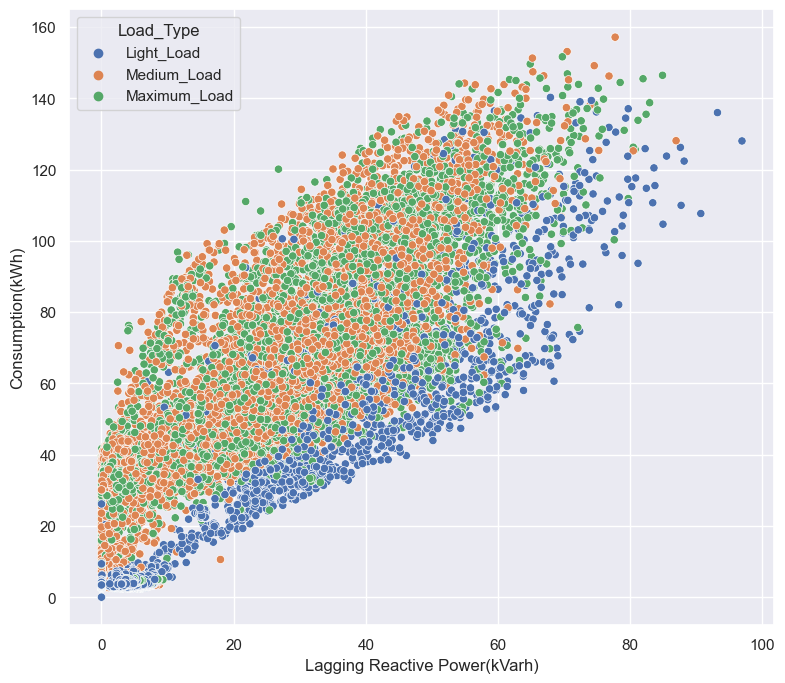

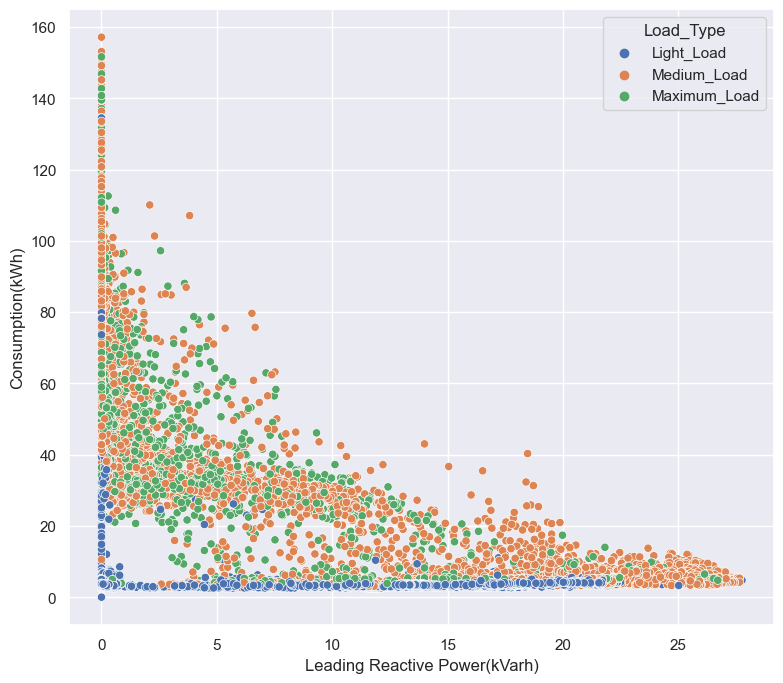

In [22]:
plt.figure(figsize=(20,8))




plt.subplot(1,2,1)
sns.scatterplot(x=df['Lagging Reactive Power(kVarh)'], y=df['Consumption(kWh)'], hue=df['Load_Type'])
plt.show()

plt.figure(figsize=(20,8))
plt.subplot(1,2,2)
sns.scatterplot(x=df['Leading Reactive Power(kVarh)'], y=df['Consumption(kWh)'], hue=df['Load_Type'])
plt.show()



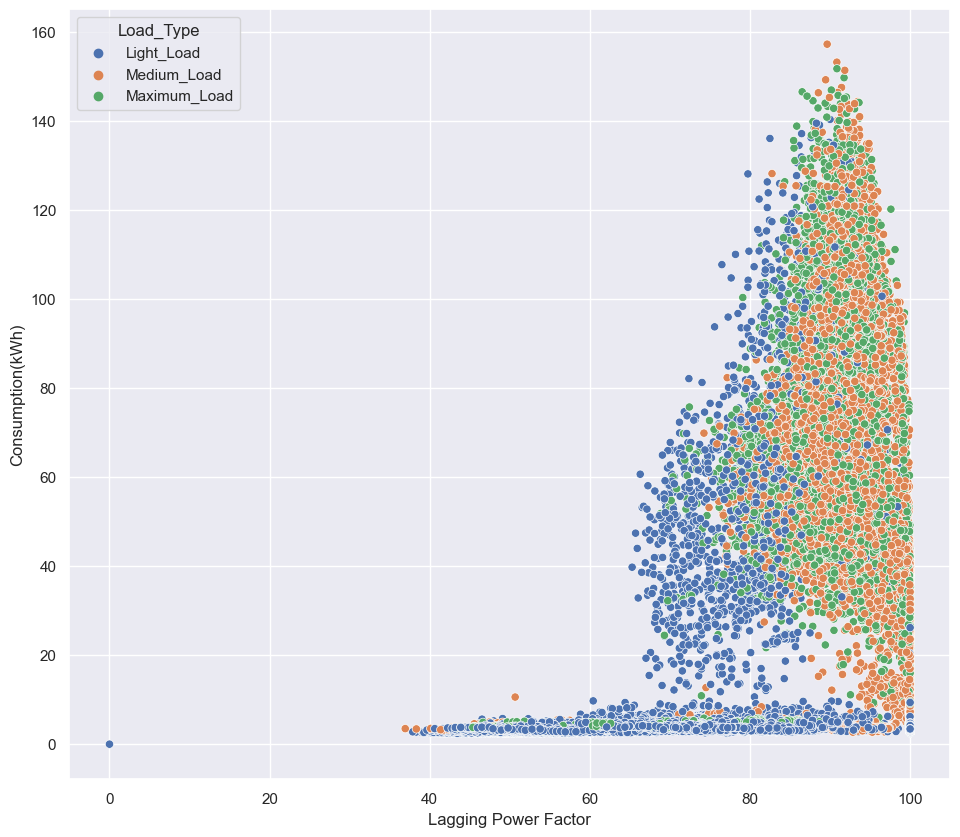

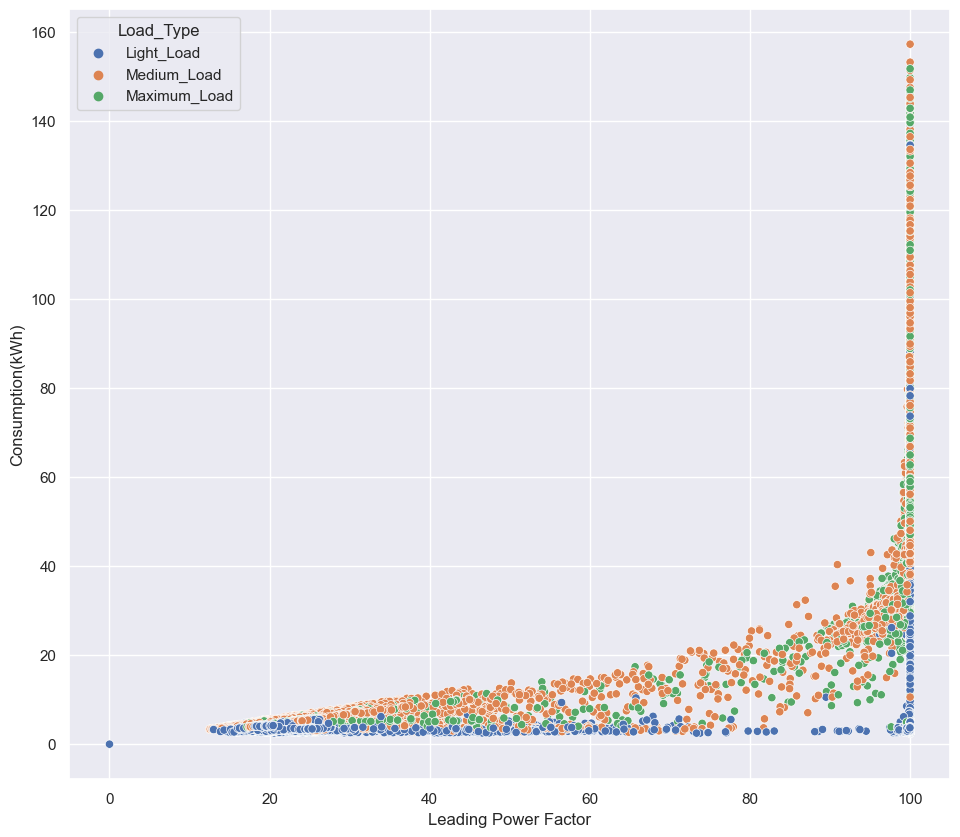

In [23]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)

sns.scatterplot(x=df['Lagging Power Factor'], y=df['Consumption(kWh)'], hue=df['Load_Type'])
plt.show()

plt.figure(figsize=(25,10))
plt.subplot(1,2,2)

sns.scatterplot(x=df['Leading Power Factor'], y=df['Consumption(kWh)'], hue=df['Load_Type'])
plt.show()

Taking load type into account, its seems like energy consumption records higher values when the load is at maximum.

### Data Preprocessing and Modeling 

In [24]:
df = df.drop(['CO2(ppm)','NSM','date'], axis = 1)
#dropping CO2 because of its seemingly random trend, NSM & date would be redaundant since I already converted date to time of day. 

#including time of day as features
df['time_of_day'] = pd.to_datetime(df['time_of_day'], format='%H:%M:%S')
df['hour'] = df['time_of_day'].dt.hour
df['minute'] = df['time_of_day'].dt.minute
df['second'] = df['time_of_day'].dt.second


In [25]:
df.head()

,Consumption(kWh),Lagging Reactive Power(kVarh),Leading Reactive Power(kVarh),Lagging Power Factor,Leading Power Factor,WeekStatus,Day_of_week,Load_Type,month,time_of_day,hour,minute,second
0,3.17,2.95,0.0,73.21,100.0,Weekday,Monday,Light_Load,1,1900-01-01 00:15:00,0,15,0
1,4.00,4.46,0.0,66.77,100.0,Weekday,Monday,Light_Load,1,1900-01-01 00:30:00,0,30,0
2,3.24,3.28,0.0,70.28,100.0,Weekday,Monday,Light_Load,1,1900-01-01 00:45:00,0,45,0
3,3.31,3.56,0.0,68.09,100.0,Weekday,Monday,Light_Load,1,1900-01-01 01:00:00,1,0,0
4,3.82,4.50,0.0,64.72,100.0,Weekday,Monday,Light_Load,1,1900-01-01 01:15:00,1,15,0


In [26]:
df.dtypes

Consumption(kWh)                        float64
Lagging Reactive Power(kVarh)           float64
Leading Reactive Power(kVarh)           float64
Lagging Power Factor                    float64
Leading Power Factor                    float64
WeekStatus                               object
Day_of_week                              object
Load_Type                                object
month                                     int32
time_of_day                      datetime64[ns]
hour                                      int32
minute                                    int32
second                                    int32
dtype: object

### Importing important libraries for classification 

In [27]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, StratifiedKFold

### Data Preprocessing for Classification

In [28]:
label_encoder = LabelEncoder()
df['Load_Type'] = label_encoder.fit_transform(df['Load_Type'])
#converting Load Type to numerical values for the classification task


#splitting the data 
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['Load_Type', 'time_of_day'], axis=1),
    df['Load_Type'],
    test_size=0.2,
    random_state=42)


categorical_columns = ['WeekStatus', 'Day_of_week']
categorical_transformer = Pipeline(
steps=[('onehot', OneHotEncoder(drop='first', sparse_output=True))])

# Using the pipeline function is a shorter way of preprocessing the data 
# Using OneHotEncoder to convert weekstatus and day of week to become categorical features, 
# drop = 'first' avoids multicollinearity
# sparse_output = False avoids producing a sparse matrix which is a common out put of a one hot encoders


numerical_columns = X_train.select_dtypes(include='number').columns
preprocessor = ColumnTransformer(
               transformers=[('cat', categorical_transformer, categorical_columns),
                            ('num', StandardScaler(), numerical_columns)],  remainder='passthrough')

   



### Modeling for Classification Task

In [30]:
load_type_mapping = {
    0: 'Light_Load',
    1: 'Medium_Load',
    2: 'Maximum_Load'
}

classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'XGBoost': XGBClassifier(random_state=42)
}

class_labels = df['Load_Type'].unique().astype(str)


for classifier_name, classifier in classifiers.items():
    print(f"Classifier: {classifier_name}")


    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])

    
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')

    
    print(f"Cross-Validation Scores (Accuracy): {cv_scores}")
    print(f"Mean Accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std():.2f})")

    #fitting pipeline on the training data
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    report_dict = classification_report(y_test, y_pred, target_names=class_labels, output_dict=True)
    custom_report = ""
    for load_type, metrics in report_dict.items():
        if load_type.isdigit():  
            load_type_name = load_type_mapping[int(load_type)]
            custom_report += f"Load Type: {load_type_name}\n"
            custom_report += "  " + "Metric".ljust(12) + "Value\n"
            custom_report += "  " + "Precision:".ljust(12) + f"{metrics['precision']:.2f}\n"
            custom_report += "  " + "Recall:".ljust(12) + f"{metrics['recall']:.2f}\n"
            custom_report += "  " + "F1-Score:".ljust(12) + f"{metrics['f1-score']:.2f}\n"
            custom_report += "  " + "Support:".ljust(12) + f"{metrics['support']}\n\n"

    print(custom_report)

    print("=" * 50)
    print("=" * 50)


Classifier: Random Forest
Cross-Validation Scores (Accuracy): [0.97449617 0.97717139 0.97181591 0.97574028 0.97484838]
Mean Accuracy: 0.97 (+/- 0.00)
Load Type: Light_Load
  Metric      Value
  Precision:  0.98
  Recall:     0.99
  F1-Score:   0.98
  Support:    3572.0

Load Type: Maximum_Load
  Metric      Value
  Precision:  0.98
  Recall:     0.97
  F1-Score:   0.98
  Support:    1499.0

Load Type: Medium_Load
  Metric      Value
  Precision:  0.97
  Recall:     0.96
  F1-Score:   0.97
  Support:    1937.0


Classifier: Gradient Boosting
Cross-Validation Scores (Accuracy): [0.96611379 0.9580881  0.96343204 0.96432394 0.96485908]
Mean Accuracy: 0.96 (+/- 0.00)
Load Type: Light_Load
  Metric      Value
  Precision:  0.98
  Recall:     0.98
  F1-Score:   0.98
  Support:    3572.0

Load Type: Maximum_Load
  Metric      Value
  Precision:  0.96
  Recall:     0.90
  F1-Score:   0.93
  Support:    1499.0

Load Type: Medium_Load
  Metric      Value
  Precision:  0.91
  Recall:     0.95
  F1

#### Summary of Classification Results: 

The results obtained from my selected machine learning models reveal substantial results and offer valuable insights in the context of my chosen project matter. The Random Forest and XGBoost classifiers stand out as high-performing models, consistently achieving impressive accuracy rates. The Random Forest classifier, for example, shows a cross-validation accuracy of approximately 97%, a performance that's consistent to the test dataset with an accuracy score of 98%. Similarly, the XGBoost classifier demonstrates an exceptional cross-validation accuracy, ranging around 99%, and maintains this exceptional performance on the test set, achieving an accuracy rate of 99%.


While the Support Vector Machine, K-Nearest Neighbors, and Logistic Regression models displays relatively slightly lower accuracy values as they display cross-validation and test set accuracies of around 85%, 83%, and 76%, respectively. 

It's worth emphasizing that while accuracy is a important metric, other metrics such as precision, recall and F1-score can provide valuable insights as a counter measure for problems such as imbalanced class distributions or domain specific considerations. 

### Importing important libraries for Regression

In [31]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Data preprocessing for regression

In [38]:
categorical_transformer_reg = Pipeline(
    steps=[('onehot', OneHotEncoder(drop='first', sparse_output=False))])

preprocessor_reg = ColumnTransformer(
    transformers=[('cat', categorical_transformer_reg, categorical_columns)], remainder='passthrough')

y_regression = df['Consumption(kWh)']

#removing Leading Reactive Power (KVarh) and 'Lagging Power Factor' as they have very low correlations to consumption. 

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    df.drop(['Consumption(kWh)','time_of_day','Leading Reactive Power(kVarh)','Lagging Power Factor'], axis=1),
    y_regression,
    test_size=0.2,
    random_state=42)

### Modeling for Regression Task

In [39]:
regressors = {
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'Linear Regression': LinearRegression(),
    'XGBoost Regressor': XGBRegressor(random_state=42)}

for regressor_name, regressor in regressors.items():
    print(f"Regressor: {regressor_name}")

    pipeline = Pipeline([('preprocessor', preprocessor_reg), 
                        ('regressor', regressor)])
    
    pipeline.fit(X_train_reg, y_train_reg)

    y_pred_reg = pipeline.predict(X_test_reg)

    mse = mean_squared_error(y_test_reg, y_pred_reg)
    rmse = np.sqrt(mse)  
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    
    mape = np.mean(np.abs((y_test_reg - y_pred_reg) / y_test_reg)) * 100
    cv = np.std(y_pred_reg) / np.mean(y_pred_reg) * 100
    r2 = r2_score(y_test_reg, y_pred_reg)

    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"Coefficient of Variation (CV): {cv:.2f}%")
    print(f"R-squared (R2): {r2:.2f}")
    print("=" * 50)


Regressor: Random Forest Regressor
Mean Squared Error (MSE): 53.47
Root Mean Squared Error (RMSE): 7.31
Mean Absolute Error (MAE): 3.39
Mean Absolute Percentage Error (MAPE): 9.33%
Coefficient of Variation (CV): 118.68%
R-squared (R2): 0.95
Regressor: Gradient Boosting Regressor
Mean Squared Error (MSE): 66.19
Root Mean Squared Error (RMSE): 8.14
Mean Absolute Error (MAE): 4.44
Mean Absolute Percentage Error (MAPE): 21.52%
Coefficient of Variation (CV): 116.72%
R-squared (R2): 0.94
Regressor: Support Vector Regressor
Mean Squared Error (MSE): 183.25
Root Mean Squared Error (RMSE): 13.54
Mean Absolute Error (MAE): 8.25
Mean Absolute Percentage Error (MAPE): 52.22%
Coefficient of Variation (CV): 123.18%
R-squared (R2): 0.84
Regressor: K-Nearest Neighbors Regressor
Mean Squared Error (MSE): 74.95
Root Mean Squared Error (RMSE): 8.66
Mean Absolute Error (MAE): 4.17
Mean Absolute Percentage Error (MAPE): 12.72%
Coefficient of Variation (CV): 118.35%
R-squared (R2): 0.93
Regressor: Linear Re

#### Summary of Regression Results: 
The evaluation metrics chosen to assess the performance of various regression models to provide valuable insights into their predictive capacities. Among all the chosen models, the Random Forest and XGBoost Regressors relatively performed the best. 
These models produced the lowest errors, as shown by their relatively low Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE). Furthermore, they provide valuable information in  explaining the variance in the target variable, indicated by their high R-squared (R^2) values, with both achieving R^2 scores of around 0.95 to 0.96. Contrarily, the Support Vector Regressor seem to be inferior in terms of predictive accuracy, producing higher errors and a lower R^2 score of 0.84. 

In a nutshell, the Random Forest and XGBoost Regressors prove to be the most viable choices for accurate predictions in this project matter, while the Support Vector Regressor demonstrates comparatively inferior performance. 


It is important to note that while modeling, very little fine tuning of hyper parameters were used since the models relatively performed well enough and to avoid complexity in the models. 